<a href="https://colab.research.google.com/github/winwinteam/1sutd-stats-team5-prj/blob/main/Team_5_Project_(JH)_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naming convention (To delete)


*   dfjh : JH's df
*   dftz : Terry's df
* dfsc
* dfjw
* dfvc 




# Common code

In [63]:
IS_RUNNING_GOOGLE_COLAB = True
#IS_RUNNING_GOOGLE_COLAB = False

csv_pathname = "../dataset/" + "Ecommerce - Hour Data.csv"
sum_pathname = "../dataset/" + "Ecommerce - Hour Data-sum-day.csv"

if IS_RUNNING_GOOGLE_COLAB:  
  zip_pathname = "../dataset/" +  "Ecommerce - Hour Data.zip"


In [64]:
# import libarry
import os
import time
import pytz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import seaborn as sns

from statsmodels.stats.diagnostic import normal_ad
import statsmodels.api as sm

from sklearn.preprocessing import QuantileTransformer

In [65]:
# timing information for checking errors
dt.timezone(offset=dt.timedelta(hours=+8))
print("-"*20)
starttime = dt.datetime.now(pytz.timezone('Singapore'))
print(f"START time {str(starttime).split('.')[0]}")
print(f"\tcheck END time at the final cell output \n\tto confirm the notebook is successfully executed till the end")

--------------------
START time 2022-05-15 08:52:56
	check END time at the final cell output 
	to confirm the notebook is successfully executed till the end


 Project Requirement (to[link text](https:// [link text](https://)) delete during 

> [Indented block](https:// [link text](https:// [link text](https:// [link text](https://))))








```
# This is formatted as code
```

tepresentation)
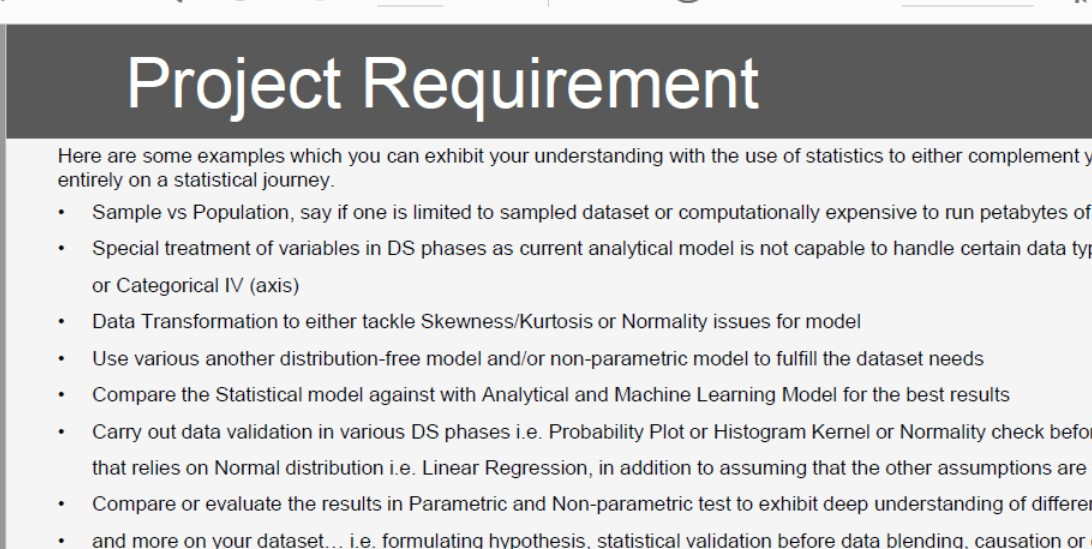

## Introduction

We investigated 3 business objectives and presented their respective conclusion and supporting statistical test result.

|Business objective|Finding|Supporting test result|
|-|-|-|
|-|-|-|
|-|-|-|
|-|-|-|
|-|-|-|

## Common Utility functions

Here are the reusable utitlity functions


In [66]:
# mout google drive
import time
if IS_RUNNING_GOOGLE_COLAB:
  from google.colab import drive
  import zipfile
  drive.mount('/content/drive')
  project_dir = "/content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/" #don't change    
  src_dir = project_dir + "src/"
  os.chdir(src_dir)
  assert os.path.exists(zip_pathname), print(f"can't find {zip_pathname} in Google drive")    

print(f"current working directory is \n\t{os.getcwd()}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
current working directory is 
	/content/drive/.shortcut-targets-by-id/1hq1js1i_5vtP8Ib96QdKM31o5JrADOez/sutd-team5-prj/src


In [67]:
def get_df_from_protected_zipfile(zip_pathname, password='VNjAMFv268"(*C*y'):

  assert(os.path.exists(zip_pathname)), print(f"can't find {zip_pathname}")

  # file = zipfile.ZipFile(zip_pathname)
  # file.setpassword(pwd = bytes('VNjAMFv268"(*C*y', 'utf-8' ))  

  with zipfile.ZipFile(zip_pathname) as file:
    try: 
      file.extractall(pwd=bytes(password, 'utf-8' ), path=os.path.dirname(zip_pathname))
    except:    
      assert False, print(f"fail to unzip {zip_pathname}")

  csv_pathname = zip_pathname[:-4]+'.csv'  
  assert os.path.exists(csv_pathname), print(f"can't find {csv_pathname}")
  try:
    df =pd.read_csv(csv_pathname)  
    print(f"read {csv_pathname}")
  except:
    print(f"can't read {csv_pathname}")

  os.remove(csv_pathname)
  print(f"removed {csv_pathname}")      

  return df

In [68]:
assert(os.path.exists(zip_pathname)), print(f"can't find {zip_pathname}")
file = zipfile.ZipFile(zip_pathname)
file.setpassword(pwd = bytes('VNjAMFv268"(*C*y', 'utf-8' ))
print(file.infolist)
# file.setpassword(pwd = bytes(password, 'utf-8' ))  
print(f"unzipping {zip_pathname}")
file.extractall()

os.listdir("../dataset/")

<bound method ZipFile.infolist of <zipfile.ZipFile filename='../dataset/Ecommerce - Hour Data.zip' mode='r'>>
unzipping ../dataset/Ecommerce - Hour Data.zip


['cookie_cats.csv',
 'WhatsgoodlyData-10.csv',
 'WhatsgoodlyData-6.csv',
 'csv-list.txt',
 'Ecommerce - Hour Data.zip']

In [69]:
# utility functions
# Hypothesis test on non-probability based sampling

def get_df_sum_by_date(df:pd.DataFrame,
                         column_date:str, 
                         column_aggregate=[], 
                         freq='D',
                         is_plot=True
                         ):
    """_summary_
    Aggregate columns in input dataframe by summing values given in "column_aggregate",
    according to frequency given for column_date
    
    :param df: _description_
    :type df: pd.DataFrame
    :param column_date: name of the column that stores date
    :type column_date: str
    :param column_aggregate: _description_, defaults to []
    :type column_aggregate: list, list of column name for the column to be stored
    :param freq: _description_, defaults to 'D'
    :type freq: str, default sum by day
    :param is_plot: _description_, defaults to True
    :type is_plot: bool, optional
    :return: _description_
    :rtype: _type_
    """
    
    df[f"{column_date}"] = pd.to_datetime(df[f"{column_date}"])    
    # df.rename(columns={column_date:"yyyy-mm-dd"})
    df.set_index(column_date, inplace=True)
    df_sum = df[column_aggregate].resample(rule=freq).sum()    
    
    if(is_plot):
        df_sum.plot(subplots=True, grid=True, figsize=(10, len(column_aggregate)))
        plt.show() 
    
    df_sum.reset_index(inplace=True)
    
    return df_sum

def plot_qqplot(df_series, title, ax):
    fontsize = 14
    sm.qqplot(df_series, line="s", ax=ax)
    ax.set_title(f"{title}")
    # ax.set_ylabel(fontdict={'fontsize':fontsize})
    plt.show()

def plot_hist_kde_qq(df_series, is_input_transformed=False):
    df_series_name = argname("df_series")
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.subplots_adjust(wspace=0.3)
    fig.set_figwidth(14)
    print(f"{df_series_name}.mean()", round(df_series.mean()))
    if is_input_transformed == False:
        print(f"np.log({df_series_name}.mean())", round(np.log(df_series.mean()), 2))
        print(f"np.log({df_series_name}.std())", round(np.log(df_series.std()), 2))
    df_series.plot.hist(title=df_series_name, ax=ax1)
    df_series.plot.kde(title=df_series_name, ax=ax1, secondary_y=True)

    plot_qqplot(df_series, df_series_name, ax=ax2)
    plt.show()


def plot_pivot(index, columns, normalize="index", figsize=(20, 20),
               ncol=1, bbox_to_anchor=(1.35, 0.3), loc='center right'):

    df_crosstab_normalized = pd.crosstab(
        index=index, columns=columns, normalize=normalize
    )
    # display(df_crosstab_normalized)
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    fig.add_subplot(ax)
    df_crosstab_normalized.plot(kind="bar", stacked=True, ax=ax)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.4, box.height * 0.5])

    # Put a legend to the right of the current axis
    ax.legend(loc=loc, bbox_to_anchor=bbox_to_anchor, ncol=ncol)
    plt.show()

# JH's section

## Normality test using Shapiro-Wilk Test bold text

tests If data is normally distributed 

**Assumption** : Observations are identically distributed

The dataset is an ecommerce

> Indented block



In [ ]:
#Checking Histogram
dfjh = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")
mydf = dfjh # if you want to use mydf 
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(mydf['total_sales'])
plt.show()

In [ ]:
DataToTest = mydf['gross_profit']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

## Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [ ]:
# D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = mydf['gross_profit']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normally distributed')

## Check if the feature: 'gross_profit' is normally distributed using  Anderson-Darling test.

In [ ]:
alpha_value = 0.05
random_seed = 123

In [ ]:
# Anderson-Darling test

(test_statistic, p_value) = normal_ad(mydf['gross_profit'])      

print("The test statistic is: ", round(test_statistic,3))
print("The p-value is: ", round(p_value,3),"\n")

if p_value < alpha_value:
    print("At", alpha_value, "level of significance, we REJECT null hypothesis.")
    print("Conclusion: Sample likely not follow a normal distribution.")
else:
    print("At", alpha_value, "level of significance, we FAILED TO REJECT null hypothesis.")
    print("Conclusion: Sample likely follow a normal distribution.")

## Transform the feature: 'gross_profit'  to better fit the normal distribution using QuantileTransformer

In [ ]:
#Define function for comparing two plots
def compare_plot(feature, transformed_feature):
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)

    stdDev = np.round(np.std(feature)[0],4) # for normal distribution, standard deviation is 1
    skewness = np.round(skew(feature),4) # for normal distribution, skewness = 0
    excess_kurtosis = np.round(kurtosis(feature),4) # for normal distribution, excess kurtosis = 0
    sns.histplot(feature, kde=True, ax=ax[0], legend=False)
    ax[0].set_xlabel(feature.columns[0])
    ax[0].set_title("ORIGINAL \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(stdDev, skewness, excess_kurtosis));

    transformed_stdDev = np.round(np.std(transformed_feature)[0],4)
    transformed_skewness = np.round(skew(transformed_feature),4)
    transformed_excess_kurtosis = np.round(kurtosis(transformed_feature),4)
    sns.histplot(transformed_feature, kde=True, ax=ax[1], legend=False)
    ax[1].set_xlabel(feature.columns[0])
    ax[1].set_title("TRANSFORMED \n Standard Dev.: {0} \n Skewness: {1} \n Kurtosis: {2}".format(transformed_stdDev, transformed_skewness, transformed_excess_kurtosis));

In [ ]:

# Select feature
feature = mydf[["gross_profit"]]

# Transformation
quantile = QuantileTransformer(output_distribution='normal', n_quantiles=len(feature)) # with gaussian output
quantile.fit(feature) # to avoid data leakage, only fit to training data
transformed_feature = quantile.transform(feature) # then perform transform on both training data and test data.
transformed_feature = pd.DataFrame(transformed_feature)

# Plot
compare_plot(feature,transformed_feature)

## Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

In [ ]:
FirstSample = mydf['total_sales']
SecondSample = mydf['gross_profit']

plt.plot(FirstSample,SecondSample)
plt.show()

In [ ]:
FirstSample = mydf['total_sales']
SecondSample = mydf['product_price']

plt.plot(FirstSample,SecondSample)
plt.show()

In [ ]:
#Spearman Rank Correlation
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

In [ ]:
mydf.corr(method="pearson")

In [ ]:
FirstSample = mydf['net_quantity']
SecondSample = mydf['ordered_item_quantity']

plt.plot(FirstSample,SecondSample)
plt.show()

In [ ]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

## Correlation of categorical variable - Chi square test

In [ ]:
mydf2 = pd.crosstab(mydf['financial_status'], mydf['fulfillment_status'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['shipping_city'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['product_vendor'],margins = False)
#mydf2 = pd.crosstab(mydf['product_type'], mydf['referrer_source'],margins = False)

In [ ]:
mydf2

In [ ]:
stat, p, dof, expected = chi2_contingency(mydf2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

# Vincent's section

In [78]:
if IS_RUNNING_GOOGLE_COLAB: 
    assert os.path.exists(zip_pathname), print(f"can't find {zip_pathname}")
    dfvc = get_df_from_protected_zipfile(zip_pathname = zip_pathname)
else:
    dfvc = pd.read_csv(csv_pathname)
 

read ../dataset/Ecommerce - Hour Data.csv
removed ../dataset/Ecommerce - Hour Data.csv


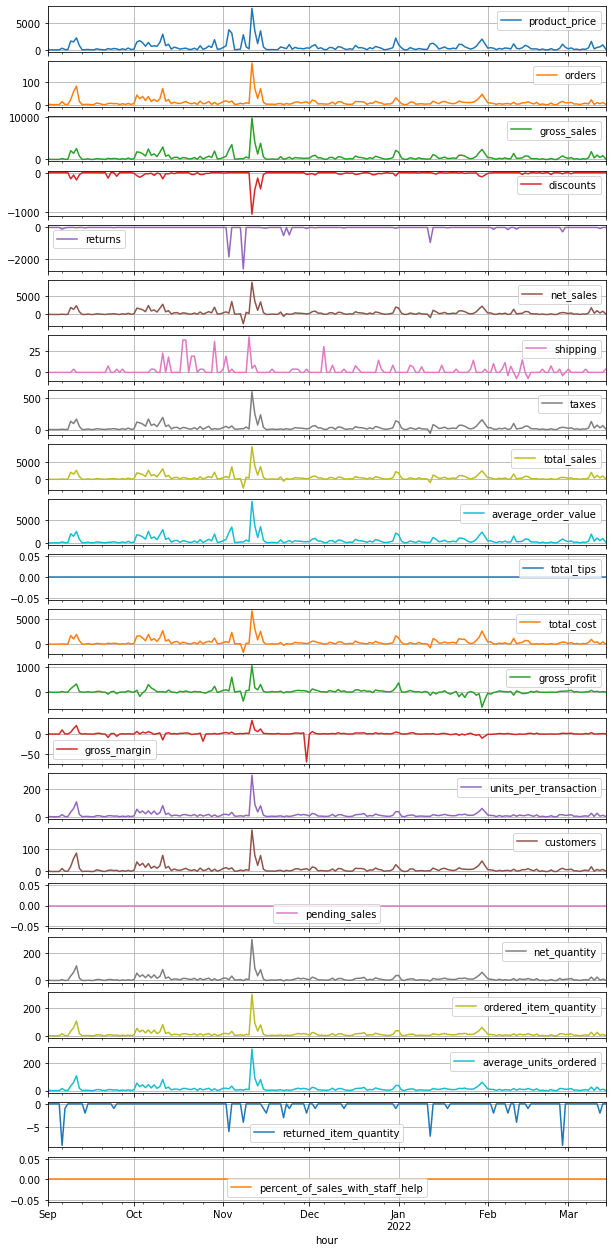

,mmdd,day_name,net_sales
0,2021-09-01,Wednesday,65.98
1,2021-09-02,Thursday,0.00
2,2021-09-03,Friday,0.00
3,2021-09-04,Saturday,0.00
4,2021-09-05,Sunday,0.00
...,...,...,...
190,2022-03-10,Thursday,343.74
191,2022-03-11,Friday,1007.02
192,2022-03-12,Saturday,395.14
193,2022-03-13,Sunday,879.44


In [79]:
col_sum = ['product_price', 'orders', 'gross_sales', 'discounts', 'returns', 'net_sales',
           'shipping', 'taxes', 'total_sales', 'average_order_value', 'total_tips', 'total_cost',
           'gross_profit', 'gross_margin', 'units_per_transaction', 'customers', 'pending_sales',
           'net_quantity', 'ordered_item_quantity', 'average_units_ordered', 'returned_item_quantity',
           'percent_of_sales_with_staff_help']

dfcv = dfvc[dfvc.sale_kind=="order"]
dfcv = dfcv[dfcv.sale_line_type=="product"]

df_sum = get_df_sum_by_date(
  dfvc,
  column_date="hour", 
  column_aggregate=col_sum, 
  freq='D',
  is_plot=True
  )

df_sum["day_name"] = df_sum.hour.dt.day_name()
df_sum.rename(columns={"hour":"mmdd"},inplace=True)

cols = list(df_sum.columns)
display(df_sum[["mmdd", "day_name", "net_sales"]])


In [ ]:
## Dates analysis

# Data exploration using time series information
print(mydf.columns)
print(f"dataframe without considering order_name (shape {mydf.shape}) ")
display(mydf.head(2))
 
## Exclude rows without transactions

# Only keep rows that have transaction

mydf_notna = mydf[mydf.order_name.isna()==False]
print(f"dataframe with valid order_name (shape {mydf_notna.shape}) ")
display(mydf_notna.head(2))
print(f"only keep rows with non-zero order_name")
df = mydf_notna
#'total_sales', 'gross_sales', 'average_order_value', 'returned_item_quantity', 
#'gross_profit', 'ordered_item_quantity', 'net_quantity', 'product_type'

In [ ]:
mydf.reset_index(inplace=True)
mydf["HH"] = mydf.hour.dt.hour     
mydf.set_index("hour", inplace=True)
display(mydf[["HH", "gross_sales"]].head(2))   

# Soon Chee's section

In [ ]:
dfsc = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")

# Terry's section

In [ ]:
dftz = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")

# John's section

In [ ]:
dfjw = pd.read_csv(data_dir + "Ecommerce - Hour Data.csv")

# Common section to check errors


In [ ]:
os.remove(csv_pathname)
print(f"removed {csv_pathname}")    

In [ ]:
# catch error message
!grep -rni "error" "./Team 5 Project (JH) v1.0.ipynb"

In [ ]:
print(f"END time {str(dt.datetime.now(pytz.timezone('Singapore'))).split('.')[0]}")